In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/

In [3]:
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 94% 313M/331M [00:03<00:00, 136MB/s]
100% 331M/331M [00:03<00:00, 90.2MB/s]


In [5]:
!unzip -q /content/utkface-new.zip -d /content/

In [6]:
import seaborn as sns

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import os
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPool2D,Input

In [8]:
from google.colab.patches import cv2_imshow

In [9]:
import os
child = []
for i in os.listdir('/content/crop_part1/')[:2000]:
  child.append(i)


In [10]:
age = []
gender = []
images = []
for i in range(0,len(child)):
  path = child[i]
  path = path.split('_')
  age.append(path[0])
  gender.append(path[1])
  patharr = cv2.imread('/content/crop_part1/' + child[i])
  images.append(patharr)


In [11]:
for i in range(45,48):
  print(child[i])

28_1_2_20170104021520301.jpg.chip.jpg
74_0_2_20170105174417462.jpg.chip.jpg
10_1_3_20170104221645430.jpg.chip.jpg


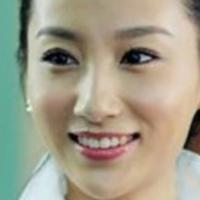

age:  28
Girl


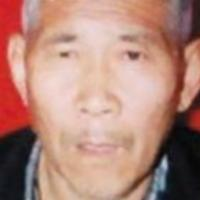

age:  74
Boy


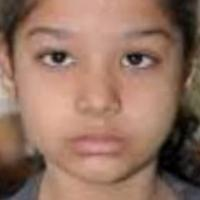

age:  10
Girl


In [12]:
for i in range(45,48):
  cv2_imshow(images[i])
  print('age: ',age[i])
  gen = int(gender[i])
  result = "Girl" if gen==1/1. else "Boy"
  print(result)

In [13]:

x = age
y = gender

In [14]:
df = []
for i in os.listdir('/content/UTKFace'):
  df.append(i)

In [15]:
from google.colab.patches import cv2_imshow

In [16]:
# for i in range(0,5):
#   img = cv2.imread('/content/UTKFace/' + df[i])
#   cv2_imshow(img)


In [17]:
len(df)

23708

In [18]:
df[0]

'1_0_4_20161221201458610.jpg.chip.jpg'

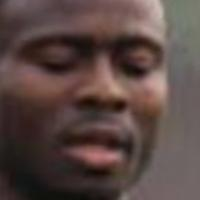

In [19]:

img = cv2.imread('/content/UTKFace/'+ df[7])
cv2_imshow(img)

In [20]:
t = 0
for i in df:
  if(t<5):
    string = i.split('_')
    print(string[0],string[1])
    t = t+1

  else:
    break

1 0
21 1
2 1
36 0
1 0


In [21]:
import os

ages = []
genders = []
images = []

for i in df:

    string = i.split('_')
    ages.append(string[0])
    genders.append(string[1])
    directory_path = '/content/UTKFace/'
    if os.path.isdir(directory_path):
        full_path = os.path.join(directory_path, i)
        images.append(full_path)
    else:
        print(f"The path {directory_path} is not a directory.")


In [22]:
df = pd.DataFrame()

In [23]:
df['images'],df['ages'],df['genders'] = images,ages,genders

In [24]:
df.head()

,images,ages,genders
0,/content/UTKFace/1_0_4_20161221201458610.jpg.c...,1,0
1,/content/UTKFace/21_1_1_20170112193015117.jpg....,21,1
2,/content/UTKFace/2_1_2_20161219142446329.jpg.c...,2,1
3,/content/UTKFace/36_0_0_20170117183317229.jpg....,36,0
4,/content/UTKFace/1_0_2_20161219155759221.jpg.c...,1,0


In [25]:
df.isnull().sum()

images     0
ages       0
genders    0
dtype: int64

In [26]:
gend_convert = {0:'Male',1:'Female'}

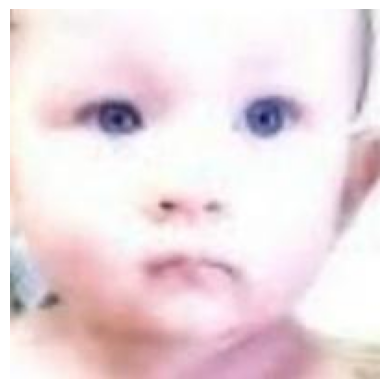

In [27]:
from PIL import Image
img = Image.open(df['images'][0])
plt.axis('off')
plt.imshow(img)

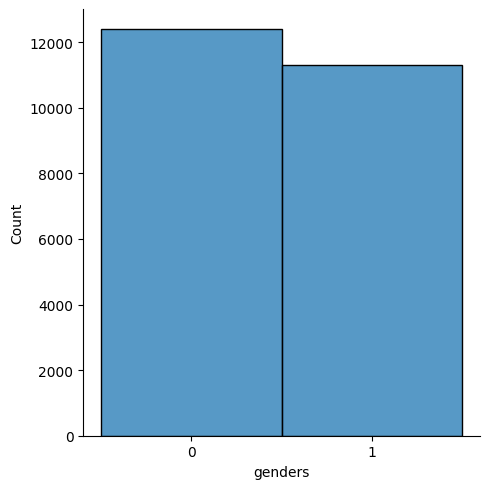

In [28]:
sns.displot(df['genders'])

In [29]:
from keras.preprocessing.image import load_img


In [30]:
gend_convert[0]

'Male'

In [31]:
plt.figure(figsize=(25,25))
files = df.iloc[0:25]
for index,file,age,gender in files.itertuples():
  plt.subplot(5,5,index+1)
  img = load_img(file)
  plt.imshow(img)
  plt.title(f"Age: {age} Gender:{gend_convert[int(gender)]}")
  plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [32]:
from tqdm import tqdm


In [33]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode="grayscale")
        img = img.resize((128, 128), Image.LANCZOS)
        features.append(np.array(img))

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features



In [34]:
x = extract_features(df['images'])


100%|██████████| 23708/23708 [00:29<00:00, 798.56it/s] 


In [35]:
X = x/255.0

In [36]:
y_gender = np.array(df['genders'])
y_age = np.array(df['ages'])

In [37]:
input_shape = (128,128,1)

In [38]:
X.shape

(23708, 128, 128, 1)

In [39]:
from tensorflow.keras.layers import MaxPooling2D


In [40]:
inputs = Input((input_shape))
conv_1 = Conv2D(32,kernel_size=(3,3),activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64,kernel_size=(3,3),activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128,kernel_size=(3,3),activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256,kernel_size=(3,3),activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
flatten = Flatten()(maxp_4)

dense_1 = Dense(256,activation='relu')(flatten)
dense_2 = Dense(256,activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1,activation='sigmoid',name='gender_out')(dropout_1)
output_2 = Dense(1,activation='relu',name='age_out')(dropout_2)

model = Model(inputs=[inputs],outputs = [output_1,output_2])
model.compile(loss=['binary_crossentropy','mse'],optimizer='adam',metrics=['accuracy'])


In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 32)         320       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 61, 61, 64)           18496     ['max_pooling2d[0][0]']   

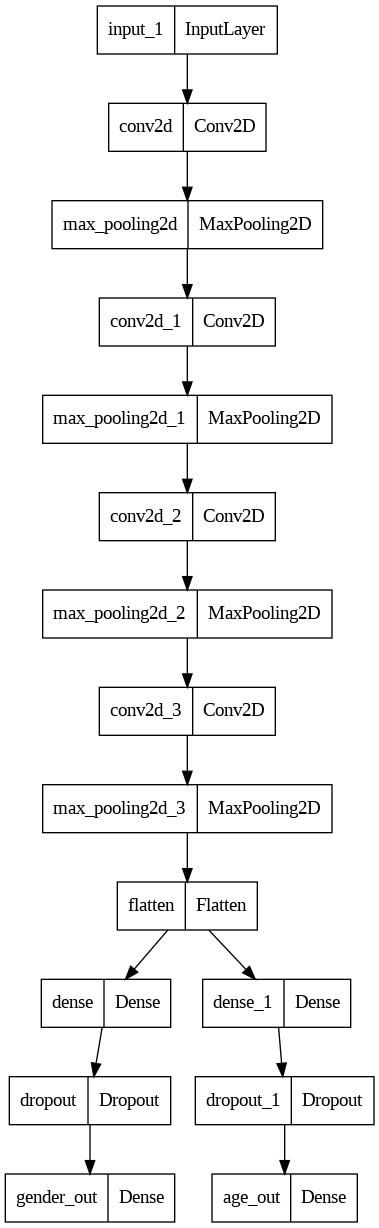

In [42]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [43]:
y_age = y_age.astype(float)


In [44]:
df.head()

,images,ages,genders
0,/content/UTKFace/1_0_4_20161221201458610.jpg.c...,1,0
1,/content/UTKFace/21_1_1_20170112193015117.jpg....,21,1
2,/content/UTKFace/2_1_2_20161219142446329.jpg.c...,2,1
3,/content/UTKFace/36_0_0_20170117183317229.jpg....,36,0
4,/content/UTKFace/1_0_2_20161219155759221.jpg.c...,1,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   images   23708 non-null  object
 1   ages     23708 non-null  object
 2   genders  23708 non-null  object
dtypes: object(3)
memory usage: 555.8+ KB


In [46]:
df['ages'] = pd.to_numeric(df['ages'], errors='coerce')
df['genders'] = pd.to_numeric(df['genders'], errors='coerce')


In [47]:
print(df.isnull().sum())


images     0
ages       0
genders    0
dtype: int64


In [48]:
print(df.dtypes)


images     object
ages        int64
genders     int64
dtype: object


In [49]:
y_gender = df['genders']
y_age = df['ages']

In [50]:
history = model.fit(x=X,y=[y_gender,y_age],batch_size=8,epochs=30,validation_split=0.15)

Epoch 1/30
2519/2519 [==============================] - 35s 11ms/step - loss: 322.5990 - gender_out_loss: 0.6202 - age_out_loss: 321.9788 - gender_out_accuracy: 0.6308 - age_out_accuracy: 0.0436 - val_loss: 185.7537 - val_gender_out_loss: 0.4730 - val_age_out_loss: 185.2808 - val_gender_out_accuracy: 0.7748 - val_age_out_accuracy: 0.0346
Epoch 2/30
2519/2519 [==============================] - 27s 11ms/step - loss: 167.9953 - gender_out_loss: 0.4528 - age_out_loss: 167.5425 - gender_out_accuracy: 0.7841 - age_out_accuracy: 0.0230 - val_loss: 122.3664 - val_gender_out_loss: 0.3763 - val_age_out_loss: 121.9900 - val_gender_out_accuracy: 0.8184 - val_age_out_accuracy: 0.0112
Epoch 3/30
2519/2519 [==============================] - 26s 10ms/step - loss: 126.6274 - gender_out_loss: 0.3905 - age_out_loss: 126.2367 - gender_out_accuracy: 0.8157 - age_out_accuracy: 0.0139 - val_loss: 104.9007 - val_gender_out_loss: 0.3556 - val_age_out_loss: 104.5452 - val_gender_out_accuracy: 0.8322 - val_age_o

In [51]:
model.save('age_gen_fin.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


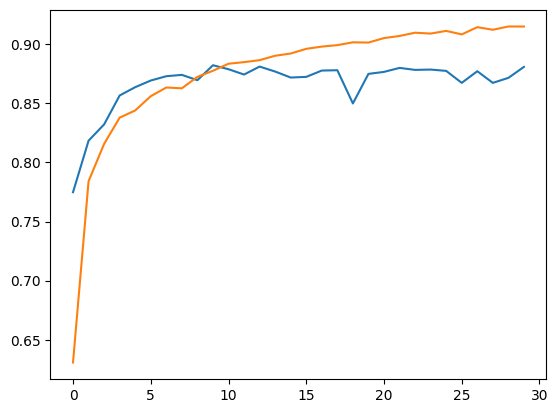

In [52]:
plt.plot(history.history['val_gender_out_accuracy'])
plt.plot(history.history['gender_out_accuracy'])

Original Gender: Female Original Age: 34
1/1 [==============================] - 0s 350ms/step
Predicted Gender: Female Predicted Age: 30


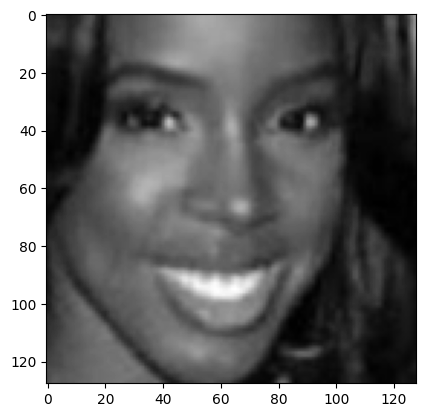

In [53]:
image_index = 549
print("Original Gender:",gend_convert[y_gender[image_index]],"Original Age:",y_age[image_index])
pred = model.predict(X[image_index].reshape(1,128,128,1))
pred_gender  = gend_convert[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:",pred_gender,"Predicted Age:",pred_age)
plt.imshow(X[image_index].reshape(128,128),cmap='gray')

1/1 [==============================] - 0s 418ms/step
Predicted Gender: Male
Predicted Age: 10


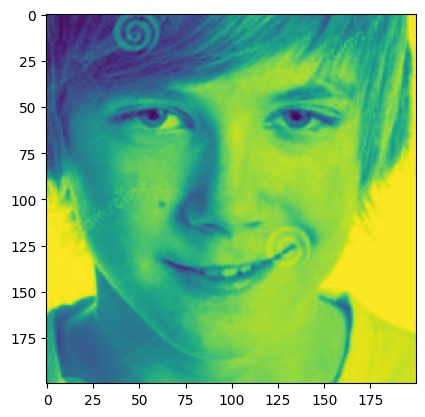

In [56]:
import cv2
import numpy as np
from keras.models import load_model

def preprocess_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    pr_img = img
    img = cv2.resize(img, (128, 128))
    img = img.reshape(1, 128, 128, 1)
    img = img.astype('float32') / 255.0  # Normalize pixel values to between 0 and 1
    return img,pr_img

def predict_age_gender(model, image_path):
    # Preprocess the image
    img ,pr_img= preprocess_image(image_path)

    # Make predictions using the model
    pred = model.predict(img)

    # Convert predictions to human-readable format
    pred_gender = gend_convert[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])

    return pred_gender, pred_age,pr_img

# Load your trained model
model = load_model('/content/age_gen_fin.h5')

# Example usage
image_path = '/content/UTKFace/10_0_0_20170110215927291.jpg.chip.jpg'
pred_gender, pred_age,plt_img = predict_age_gender(model, image_path)

plt.imshow(plt_img)
print("Predicted Gender:", pred_gender)
print("Predicted Age:", pred_age)
